In [1]:
import numpy as np
import pandas as pd

## 2 Language Identification with Naive Bayes 

### 1.

In [2]:
pre = ['e', 'j', 's']
labels = []
docs = []
for p in pre:
    for i in range(10):
        filename = f'languageID/{p}{i}.txt'
        labels.append(p)
        docs.append(open(filename).read())
# convert doccument to list of chars
docs = [[c  for c in list(doc.lower()) if c  \
         in 'qwertyuiopasdfghjklzxcvbnm '] for doc in docs]
alldocs = [i for p in docs for i in p]
S = set(alldocs)
KS = len(S)
N = 30
L = set(labels)
KL = len(L)
alpha = 0.5

priors = {}
for p in pre:
    count = labels.count(p)
    pri = (count + alpha) / (N + KL * alpha)
    priors[p] = round(pri, 6)
print(priors)

{'e': 0.333333, 'j': 0.333333, 's': 0.333333}


### 2.

In [3]:
condi_probs = {}
for p in pre:
    condi_probs[p] = {}
    for c in 'abcdefghijklmnopqrstuvwxyz ':
        top = sum([docs[i].count(c) for i in  \
                 range(len(labels)) if labels[i] == p]) + alpha
        bottom = sum([len(docs[i]) for i in  \
                 range(len(labels)) if labels[i] == p]) + KS * alpha
        condi_probs[p][c] = round(top / bottom, 6)

print('theta_e:')
print(condi_probs['e'])


theta_e:
{'a': 0.060169, 'b': 0.011135, 'c': 0.02151, 'd': 0.021973, 'e': 0.105369, 'f': 0.018933, 'g': 0.017479, 'h': 0.047216, 'i': 0.055411, 'j': 0.001421, 'k': 0.003734, 'l': 0.028977, 'm': 0.020519, 'n': 0.057922, 'o': 0.064464, 'p': 0.016752, 'q': 0.000562, 'r': 0.053825, 's': 0.066182, 't': 0.080126, 'u': 0.026664, 'v': 0.009285, 'w': 0.015496, 'x': 0.001156, 'y': 0.013844, 'z': 0.000628, ' ': 0.17925}


### 3.

In [4]:
print('\ntheta_j:')
print(condi_probs['j'])
print('\ntheta_s:')
print(condi_probs['s'])


theta_j:
{'a': 0.131766, 'b': 0.010867, 'c': 0.005486, 'd': 0.017226, 'e': 0.060205, 'f': 0.003879, 'g': 0.014012, 'h': 0.031762, 'i': 0.097033, 'j': 0.002341, 'k': 0.057409, 'l': 0.001433, 'm': 0.039799, 'n': 0.056711, 'o': 0.091163, 'p': 0.000874, 'q': 0.000105, 'r': 0.042804, 's': 0.042175, 't': 0.05699, 'u': 0.070617, 'v': 0.000245, 'w': 0.019742, 'x': 3.5e-05, 'y': 0.014151, 'z': 0.007722, ' ': 0.123449}

theta_s:
{'a': 0.10456, 'b': 0.008233, 'c': 0.037526, 'd': 0.039746, 'e': 0.113811, 'f': 0.008603, 'g': 0.007184, 'h': 0.004533, 'i': 0.04986, 'j': 0.006629, 'k': 0.000278, 'l': 0.052943, 'm': 0.025809, 'n': 0.054177, 'o': 0.072492, 'p': 0.024267, 'q': 0.007678, 'r': 0.059295, 's': 0.06577, 't': 0.035614, 'u': 0.033702, 'v': 0.005889, 'w': 9.3e-05, 'x': 0.002498, 'y': 0.007863, 'z': 0.002683, ' ': 0.168265}


### 4.

In [5]:
test = open('languageID/e10.txt').read().lower()
test = [test.count(c) for c in 'abcdefghijklmnopqrstuvwxyz ']

print('The bag-of-words vector x:')
print(test)
print('\nThe length of vector x:')
print(len(test))

The bag-of-words vector x:
[164, 32, 53, 57, 311, 55, 51, 140, 140, 3, 6, 85, 64, 139, 182, 53, 3, 141, 186, 225, 65, 31, 47, 4, 38, 2, 498]

The length of vector x:
27


### 5.

In [6]:
import numpy as np

log_p_xy = {}
pre = ['e', 'j', 's']
for p in pre:
    log_p_xy[p] = 0
    for i in range(len(test)):
        c = 'abcdefghijklmnopqrstuvwxyz '[i]
        log_p_xy[p] += test[i] * np.log(condi_probs[p][c])
    log_p_xy[p] = round(log_p_xy[p], 2)
print('The probabilities in log space:')
print(log_p_xy)

The probabilities in log space:
{'e': -7841.86, 'j': -8771.31, 's': -8467.01}


### 6.

In [7]:
log_p_yx = {}
pre = ['e', 'j', 's']
for p in pre:
    log_p_yx[p] = round(log_p_xy[p] + np.log(priors[p]), 2)

print(log_p_yx)

{'e': -7842.96, 'j': -8772.41, 's': -8468.11}


### 7.

In [8]:
from sklearn.metrics import confusion_matrix 


def predict(filename, condi_probs, priors, L):
    test = open(filename).read().lower()
    test = [test.count(c) for c in 'abcdefghijklmnopqrstuvwxyz ']
    log_p_xy = {}
    #compute log_p_xy
    for p in L:
        log_p_xy[p] = 0
        for i in range(len(test)):
            c = 'abcdefghijklmnopqrstuvwxyz '[i]
            log_p_xy[p] += test[i] * np.log(condi_probs[p][c])
        log_p_xy[p] = round(log_p_xy[p], 2)
    log_p_yx = {}
    #compute log_p_yx
    for p in L:
        log_p_yx[p] = round(log_p_xy[p] + np.log(priors[p]), 2)
    predict = ''
    # compute the prediction
    max_value = -np.inf
    for key, value in log_p_yx.items():
        if value > max_value:
            predict = key
            max_value = value
    return predict

pre = ['e', 'j', 's']
true_test_labels = []
predict_test_labels = []
for p in pre:
    for i in range(10, 20):
        true_test_labels.append(p)
        filename = f'languageID/{p}{i}.txt'
        predict_test_labels.append(predict(filename, condi_probs, priors, L))
        
print('Confusion matrix:')
print(confusion_matrix(true_test_labels, predict_test_labels))

Confusion matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


## 3 Simple Feed-Forward Network

### 2.

In [9]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.model_selection import train_test_split

#read the mnist data
x,y = fetch_openml('mnist_784',version=1,return_X_y=True)
x = x.values
y = y.values
y = [int(c) for c in y]

In [13]:
# activation functions

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis = 1).reshape(-1,1)

# loss function
def cross_entropy_loss(y, y_hat):
    return -np.sum(y * np.log(y_hat))

# convert the label to one-hot
def onehot(y):
    return np.eye(10)[y]

# forward 
def forword(x, W1, W2, W3):
    z1 = x @ W1
    sigma1 = sigmoid(z1)
    z2 = sigma1 @ W2
    sigma2 = sigmoid(z2)
    z3 = sigma2 @ W3
    y_hat = softmax(z3)
    return z1, z2, z3, sigma1, sigma2, y_hat

# backward
def backward(x, y, y_hat, W1, W2, W3, z1, z2, z3, sigma1, sigma2):
    dw3 = sigma2.T @ (y_hat- y) 
    dw2 = sigma1.T @ ((y_hat - y)@W3.T*sigma2*(1-sigma2))
    dw1 = x.T @((y_hat - y)@W3.T*sigma2*(1-sigma2)@W2.T*sigma1*(1-sigma1))
    return dw1, dw2, dw3

# predict the labels and probabilities
def predict(x, W1, W2, W3):
    z1, z2, z3, sigma1, sigma2, pre_probs = forword(x, W1, W2, W3)
    return pre_probs, np.argmax(pre_probs,axis=1)

# calculate the accuracy of prediction
def accuracy(y, y_hat):
    return sum(y == y_hat) / len(y_hat)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

# define the parameters
inputdim = 784
h1 = 32
h2 = 16
outdim = 10
lr = 0.001
batch_size = 100
epoch = 30

W1 = np.random.randn(inputdim, h1) / 1000
W2 = np.random.randn(h1, h2) / 1000
W3 = np.random.randn(h2, outdim) / 1000
train_losses = []
test_losses = []
trian_errors = []
test_errors = []
for i in range(epoch):
    # gradient descent backpropagation 
    for iter_ in range(X_train.shape[0] // batch_size):
        xt = X_train[iter_ * batch_size: (iter_ + 1) * batch_size]
        yt = y_train[iter_ * batch_size: (iter_ + 1) * batch_size]
        yt = onehot(yt)
        z1, z2, z3, sigma1, sigma2, y_hat = forword(xt, W1, W2, W3)
        dw1, dw2, dw3 = backward(xt, yt, y_hat, W1, W2, W3, z1, z2, z3, sigma1, sigma2)
        W1 = W1 - lr * dw1
        W2 = W2 - lr * dw2
        W3 = W3 - lr * dw3
    
    #calculate the train and test errors
    accus = []
    for iter_ in range(X_train.shape[0] // batch_size):
        xt = X_train[iter_ * batch_size: (iter_ + 1) * batch_size]
        y_ = y_train[iter_ * batch_size: (iter_ + 1) * batch_size]
        yt = onehot(y_)
        pre_probs, predictions = predict(xt, W1, W2, W3)
        accus.append(accuracy(y_, predictions))
    trian_errors.append(1 - np.mean(accus))
        
    accus = []
    for iter_ in range(X_test.shape[0] // batch_size):
        xt = X_test[iter_ * batch_size: (iter_ + 1) * batch_size]
        y_ = y_test[iter_ * batch_size: (iter_ + 1) * batch_size]
        yt = onehot(y_)
        pre_probs, predictions = predict(xt, W1, W2, W3)
        accus.append(accuracy(y_, predictions))
    test_errors.append(1 - np.mean(accus))
        

/var/folders/yk/2bzs17_n4nv4sbv6lbhlhd2c0000gn/T/ipykernel_32904/4247078838.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


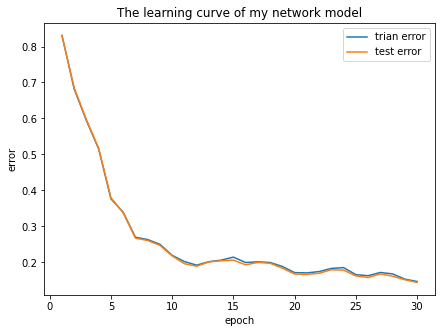

In [14]:
# draw the learning curve
import matplotlib.pyplot as plt

plt.figure(figsize = (7, 5))
plt.plot(range(1, len(trian_errors) + 1),  trian_errors)
plt.plot(range(1, len(test_errors) + 1),  test_errors)
plt.legend(['trian error', 'test error'])
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('The learning curve of my network model')
plt.show()

In [15]:
print('Test error:')
test_errors[-1]

Test error:


0.14428571428571424

In [16]:
for error in test_errors:
    print(round(error, 3))

0.83
0.685
0.596
0.517
0.38
0.338
0.267
0.261
0.247
0.218
0.196
0.189
0.201
0.205
0.206
0.193
0.2
0.198
0.184
0.168
0.167
0.17
0.18
0.179
0.162
0.158
0.168
0.162
0.152
0.144


### 3.

In [55]:
from sklearn import neural_network

mlp = neural_network.MLPClassifier(hidden_layer_sizes=(32, 16, 10), activation='logistic',
          batch_size=100, learning_rate='constant')

batch_size = 100
epoch = 30
for i in range(epoch):
    # train the model for 1 epoch 
    for iter_ in range(X_train.shape[0] // batch_size):
        xt = X_train[iter_ * batch_size: (iter_ + 1) * batch_size]
        yt = y_train[iter_ * batch_size: (iter_ + 1) * batch_size]
        mlp.partial_fit(xt, yt, classes = [0, 1,2,3,4,5,6,7,8,9])
    
    #calculate the train and test errors
    accus = []
    for iter_ in range(X_train.shape[0] // batch_size):
        xt = X_train[iter_ * batch_size: (iter_ + 1) * batch_size]
        yt = y_train[iter_ * batch_size: (iter_ + 1) * batch_size]
        predictions = mlp.predict(xt)
        accus.append(accuracy(yt, predictions))
    trian_errors.append(1 - np.mean(accus))
        
    accus = []
    for iter_ in range(X_test.shape[0] // batch_size):
        xt = X_test[iter_ * batch_size: (iter_ + 1) * batch_size]
        yt = y_test[iter_ * batch_size: (iter_ + 1) * batch_size]
        predictions = mlp.predict(xt)
        accus.append(accuracy(yt, predictions))
    test_errors.append(1 - np.mean(accus))



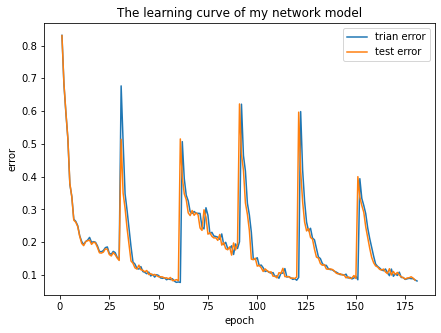

In [58]:
# draw the learning curve
import matplotlib.pyplot as plt

plt.figure(figsize = (7, 5))
plt.plot(range(1, len(trian_errors) + 1),  trian_errors)
plt.plot(range(1, len(test_errors) + 1),  test_errors)
plt.legend(['trian error', 'test error'])
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('The learning curve of my network model')
plt.show()

In [59]:
print('Test error:')
test_errors[-1]W

Test error:


0.08435714285714291

### 4.

In [72]:
W1 = (np.random.rand(inputdim, h1) - 0.5) * 2 
W2 = (np.random.rand(h1, h2) - 0.5) * 2 
W3 = (np.random.rand(h2, outdim) - 0.5) * 2  
trian_errors1 = []
test_errors1 = []
for i in range(epoch):
    # gradient descent backpropagation 
    for iter_ in range(X_train.shape[0] // batch_size):
        xt = X_train[iter_ * batch_size: (iter_ + 1) * batch_size]
        yt = y_train[iter_ * batch_size: (iter_ + 1) * batch_size]
        yt = onehot(yt)
        z1, z2, z3, sigma1, sigma2, y_hat = forword(xt, W1, W2, W3)
        dw1, dw2, dw3 = backward(xt, yt, y_hat, W1, W2, W3, \
             z1, z2, z3, sigma1, sigma2)
        W1 = W1 - lr * dw1
        W2 = W2 - lr * dw2
        W3 = W3 - lr * dw3
    
    #calculate the train and test errors
    accus = []
    for iter_ in range(X_train.shape[0] // batch_size):
        xt = X_train[iter_ * batch_size: (iter_ + 1) * batch_size]
        y_ = y_train[iter_ * batch_size: (iter_ + 1) * batch_size]
        yt = onehot(y_)
        pre_probs, predictions = predict(xt, W1, W2, W3)
        accus.append(accuracy(y_, predictions))
    trian_errors1.append(1 - np.mean(accus))
        
    accus = []
    for iter_ in range(X_test.shape[0] // batch_size):
        xt = X_test[iter_ * batch_size: (iter_ + 1) * batch_size]
        y_ = y_test[iter_ * batch_size: (iter_ + 1) * batch_size]
        yt = onehot(y_)
        pre_probs, predictions = predict(xt, W1, W2, W3)
        accus.append(accuracy(y_, predictions))
    test_errors1.append(1 - np.mean(accus))


print(test_errors1[-1])

/var/folders/yk/2bzs17_n4nv4sbv6lbhlhd2c0000gn/T/ipykernel_32904/4247078838.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.1358571428571429


In [73]:
W1 = np.zeros((inputdim, h1))
W2 = np.zeros((h1, h2)) 
W3 = np.zeros((h2, outdim)) 
trian_errors2 = []
test_errors2 = []
for i in range(epoch):
    # gradient descent backpropagation 
    for iter_ in range(X_train.shape[0] // batch_size):
        xt = X_train[iter_ * batch_size: (iter_ + 1) * batch_size]
        yt = y_train[iter_ * batch_size: (iter_ + 1) * batch_size]
        yt = onehot(yt)
        z1, z2, z3, sigma1, sigma2, y_hat = forword(xt, W1, W2, W3)
        dw1, dw2, dw3 = backward(xt, yt, y_hat, W1, W2, W3, \
             z1, z2, z3, sigma1, sigma2)
        W1 = W1 - lr * dw1
        W2 = W2 - lr * dw2
        W3 = W3 - lr * dw3
    
    #calculate the train and test errors
    accus = []
    for iter_ in range(X_train.shape[0] // batch_size):
        xt = X_train[iter_ * batch_size: (iter_ + 1) * batch_size]
        y_ = y_train[iter_ * batch_size: (iter_ + 1) * batch_size]
        yt = onehot(y_)
        pre_probs, predictions = predict(xt, W1, W2, W3)
        accus.append(accuracy(y_, predictions))
    trian_errors2.append(1 - np.mean(accus))
        
    accus = []
    for iter_ in range(X_test.shape[0] // batch_size):
        xt = X_test[iter_ * batch_size: (iter_ + 1) * batch_size]
        y_ = y_test[iter_ * batch_size: (iter_ + 1) * batch_size]
        yt = onehot(y_)
        pre_probs, predictions = predict(xt, W1, W2, W3)
        accus.append(accuracy(y_, predictions))
    test_errors2.append(1 - np.mean(accus))


print(test_errors2[-1])

/var/folders/yk/2bzs17_n4nv4sbv6lbhlhd2c0000gn/T/ipykernel_32904/4247078838.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.8863571428571428


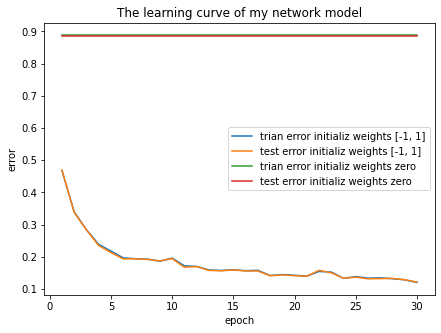

In [71]:
# draw the learning curve
import matplotlib.pyplot as plt

plt.figure(figsize = (7, 5))
plt.plot(range(1, len(trian_errors1) + 1),  trian_errors1)
plt.plot(range(1, len(test_errors1) + 1),  test_errors1)
plt.plot(range(1, len(trian_errors2) + 1),  trian_errors2)
plt.plot(range(1, len(test_errors2) + 1),  test_errors2)
plt.legend(['trian error initializ weights [-1, 1]', 'test error initializ weights [-1, 1]',  \
           'trian error initializ weights zero', 'test error initializ weights zero'])
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('The learning curve of my network model')
plt.show()
